In [1]:
###Impotar paquetes


import pandas as pd
import numpy as np
import sympy as s
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tabla=pd.read_csv("datoscromosfericos.csv") ### Lectura de los datos
print(tabla.info)
nombrecolumnas = tabla.columns.values
print(nombrecolumnas)

<bound method DataFrame.info of       Unnamed: 0     obsid                           fitsname    snrg    snrr  \
0              0    102084     spec-55859-F5902_sp02-084.fits   54.80   78.63   
1              1    103019     spec-55859-F5902_sp03-019.fits   66.33   99.07   
2              2    103025     spec-55859-F5902_sp03-025.fits   55.40   84.64   
3              3    103032     spec-55859-F5902_sp03-032.fits  387.09  455.38   
4              4    103110     spec-55859-F5902_sp03-110.fits   53.28   76.25   
...          ...       ...                                ...     ...     ...   
4995        4995  18803047  spec-55916-F5591604_sp03-047.fits   58.70   80.28   
4996        4996  18803059  spec-55916-F5591604_sp03-059.fits   56.39   71.56   
4997        4997  18803063  spec-55916-F5591604_sp03-063.fits   78.30  116.71   
4998        4998  18803070  spec-55916-F5591604_sp03-070.fits   98.43  139.79   
4999        4999  18803087  spec-55916-F5591604_sp03-087.fits   78.06   99.37

In [3]:
#### Revision por si hay valores NAN
tabla.isnull().values.any()
tabla.isnull().sum()

Unnamed: 0         0
obsid              0
fitsname           0
snrg               0
snrr               0
teff               0
teff_err           0
logg               0
logg_err           0
feh                0
feh_err            0
rv                 0
rv_err             0
ra_obs             0
dec_obs            0
gaia_source_id     5
gaia_g_mean_mag    5
figname            0
R_mean             0
R_mean_err         0
V_mean             0
V_mean_err         0
H_mean_tri         0
H_mean_tri_err     0
K_mean_tri         0
K_mean_tri_err     0
S_tri              0
S_tri_err          0
S_MWL              0
S_MWL_err          0
H_mean_rec         0
H_mean_rec_err     0
K_mean_rec         0
K_mean_rec_err     0
S_rec              0
S_rec_err          0
condition_tag      0
dtype: int64

### Los parametros donde tiene el NAN es referente al catalogo GAIA DR2, lo cual son interesantes
### ya que posiblemente no esten registradas esas fuentes(Pues si no lo revisaron los autores)
### Por lo que seran borrados y mas adelante se analizara esos conjuntos de datos con el dataset mas grande

In [4]:
### Borrado de datos 
tabla = tabla.dropna()
###verificacion si ahora el dataframe tiene NAN
tabla.isnull().values.any()


False

In [5]:
###Significado de cada columna

temperatura_efectiva = tabla["teff"]
error_temperatura_efectiva=tabla["teff_err"]
gravedad=tabla["logg"]
error_gravedad=tabla["logg_err"]
metalicidad=tabla["feh"]
error_metalicidad=tabla["feh_err"]


###tabla numerica

tabla_numerica=tabla.drop(["gaia_source_id","fitsname","figname","condition_tag"], axis=1)
tabla_numerica.isna().all()



Unnamed: 0         False
obsid              False
snrg               False
snrr               False
teff               False
teff_err           False
logg               False
logg_err           False
feh                False
feh_err            False
rv                 False
rv_err             False
ra_obs             False
dec_obs            False
gaia_g_mean_mag    False
R_mean             False
R_mean_err         False
V_mean             False
V_mean_err         False
H_mean_tri         False
H_mean_tri_err     False
K_mean_tri         False
K_mean_tri_err     False
S_tri              False
S_tri_err          False
S_MWL              False
S_MWL_err          False
H_mean_rec         False
H_mean_rec_err     False
K_mean_rec         False
K_mean_rec_err     False
S_rec              False
S_rec_err          False
dtype: bool

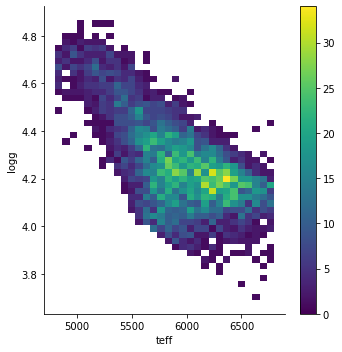

In [6]:
sns.displot(data=tabla,x="teff",y="logg",cmap="viridis",cbar=True)

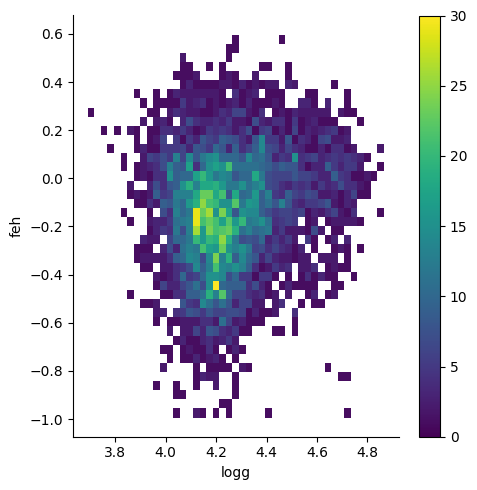

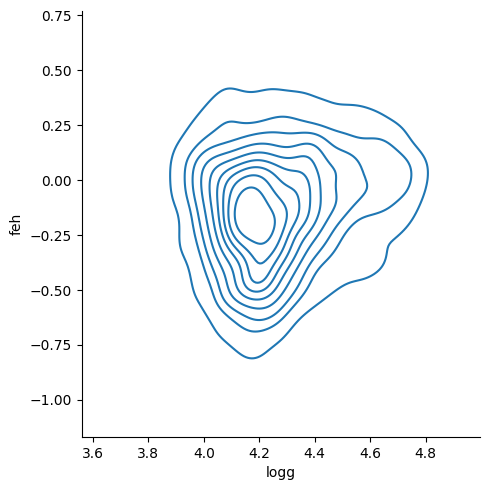

In [7]:
sns.displot(data=tabla_numerica,x="logg",y="feh", cbar=True,cmap="viridis")
sns.displot(data=tabla_numerica,x="logg",y="feh",kind="kde")






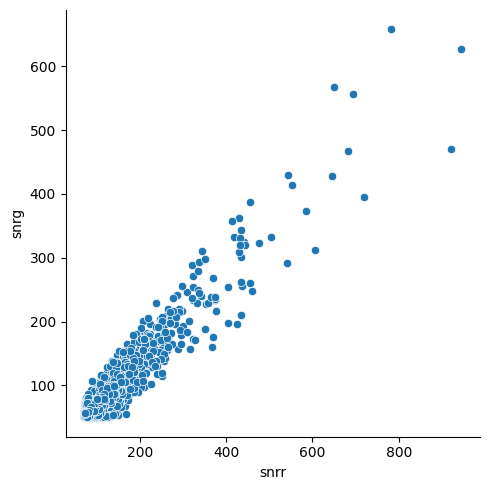

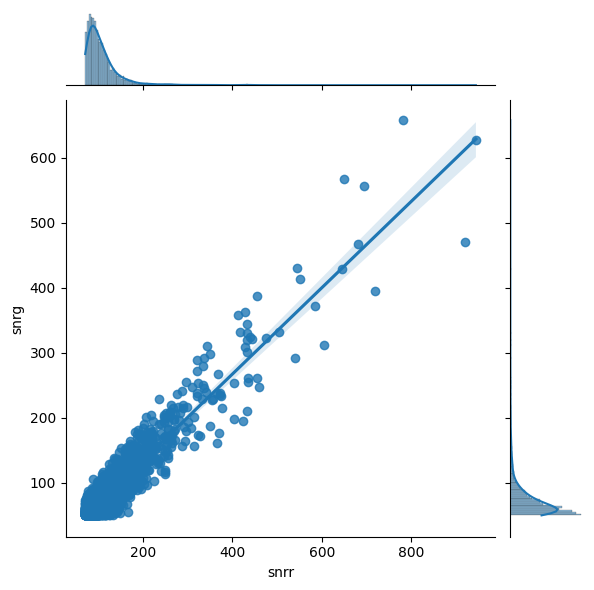

In [8]:
sns.relplot(data=tabla, x="snrr",y="snrg")
sns.jointplot(data=tabla, x="snrr", y="snrg", kind="reg")

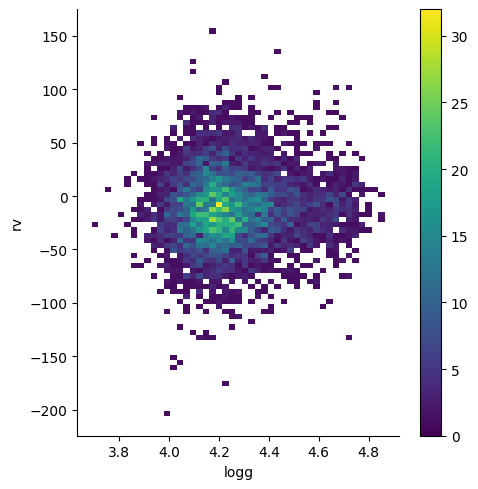

In [9]:
sns.displot(data=tabla_numerica,x="logg",y="rv",cbar=True, cmap="viridis")